In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [41]:
results = pd.read_csv('results.csv')
results = results.query("simp_algorithm == ['OS','RDP','VW','BU']")
results.head(5)

,dataset,model,simp_algorithm,performance,"knee(x,y)",time
1,ProximalPhalanxOutlineCorrectTEST_normalized,logistic-regression_norm.pkl,BU,0.447152,"(0.04443037974683545, 0.0)",0.282440
2,ProximalPhalanxOutlineCorrectTEST_normalized,logistic-regression_norm.pkl,VW,0.872785,"(1.0, 1.0)",0.016343
3,ProximalPhalanxOutlineCorrectTEST_normalized,logistic-regression_norm.pkl,RDP,0.896519,"(0.13151898734177217, 1.0)",0.564307
6,ItalyPowerDemandTEST_normalized,logistic-regression_norm.pkl,BU,0.662132,"(0.14608695652173911, 0.4471744471744472)",0.051812
8,MoteStrainTEST_normalized,decision-tree_norm.pkl,BU,0.987952,"(1.0120481927710847, 1.0)",0.310772


In [42]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc   val_acc  test_acc  \
0                  cnn   0.755300  0.676500  0.427600   
1        decision-tree   1.000000  0.583333  0.668966   
2  logistic-regression   0.681462  0.625000  0.593103   
3                  cnn   0.000000  0.000000  0.081700   
4        decision-tree   0.150838  0.089888  0.091178   
5  logistic-regression   0.139665  0.089888  0.107756   

                       dataset  
0  MiddlePhalanxOutlineCorrect  
1  MiddlePhalanxOutlineCorrect  
2  MiddlePhalanxOutlineCorrect  
3                      FaceAll  
4                      FaceAll  
5                      FaceAll  


## All Results

In [43]:
print(len(results['dataset'].unique()))
print(len(results['model'].unique()))
print(len(results['simp_algorithm'].unique()))

34
4
4


In [44]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU: ", bu_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  44.02557503198367
RDP:  53.28253263089084
BU:  57.262919753699045
VW:  58.71225644733722


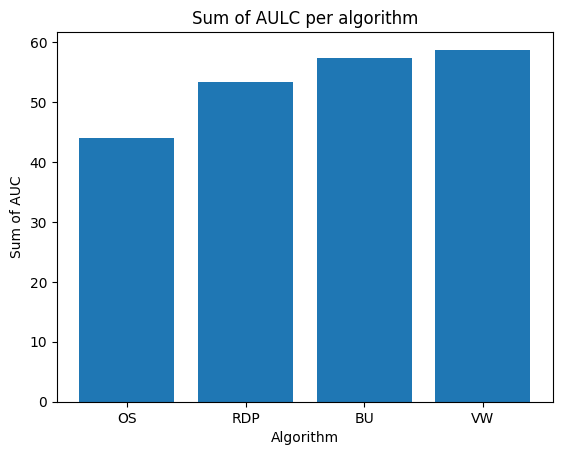

In [45]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

In [46]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU: ", bu_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.6474349269409363
RDP:  0.7611790375841548
BU:  0.8180417107671292
VW:  0.838746520676246


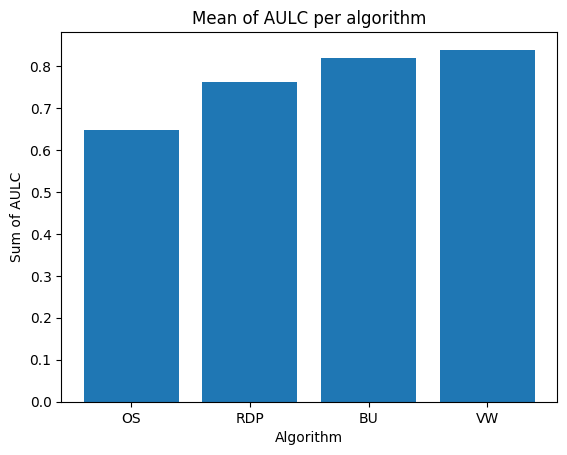

In [47]:
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, vw_alg_mean_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

In [48]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU: ", bu_alg_all_per_model)
print("VC: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn_norm.pth                    0.765495
decision-tree_norm.pkl          0.581984
knn_norm.pkl                    0.593478
logistic-regression_norm.pkl    0.648783
Name: performance, dtype: float64
RDP:  model
cnn_norm.pth                    0.817464
decision-tree_norm.pkl          0.663398
knn_norm.pkl                    0.760633
logistic-regression_norm.pkl    0.803913
Name: performance, dtype: float64
BU:  model
cnn_norm.pth                    0.909290
decision-tree_norm.pkl          0.726481
knn_norm.pkl                    0.830027
logistic-regression_norm.pkl    0.813048
Name: performance, dtype: float64
VC:  model
cnn_norm.pth                    0.863576
decision-tree_norm.pkl          0.768100
knn_norm.pkl                    0.845771
logistic-regression_norm.pkl    0.877545
Name: performance, dtype: float64


/tmp/ipykernel_4177298/2727764743.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_4177298/2727764743.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_4177298/2727764743.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_4177298/2727764743.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)


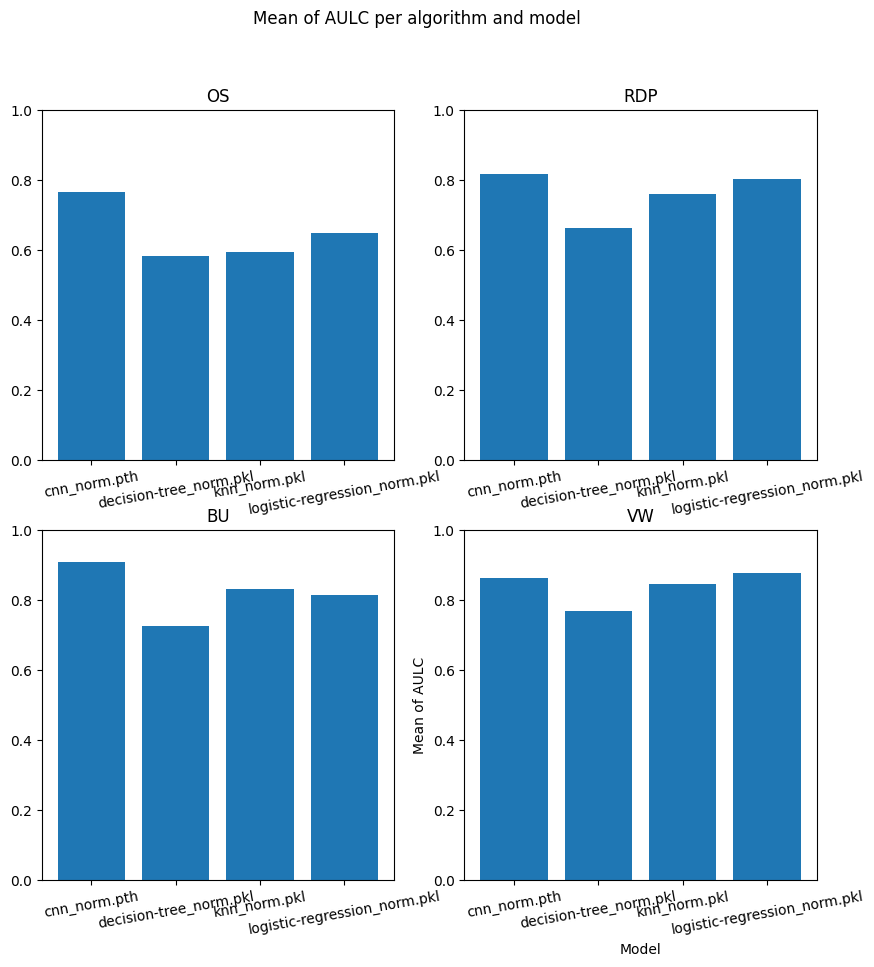

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)

plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [50]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.403228
decision-tree          0.667024
knn                    0.999654
logistic-regression    0.563943
Name: train_acc, dtype: float64

Text(0, 0.5, 'Mean of Train Accuracy')

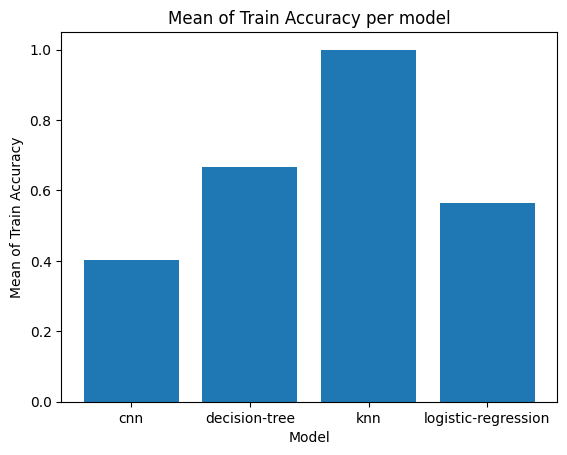

In [51]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values)
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

In [52]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.350364
decision-tree          0.453751
knn                    0.641949
logistic-regression    0.460965
Name: val_acc, dtype: float64

Text(0, 0.5, 'Mean of Train Accuracy')

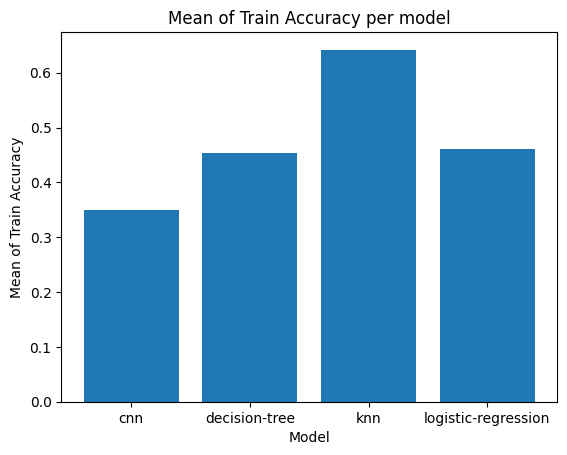

In [53]:
plt.bar(models_mean_perf_val.index, models_mean_perf_val.values)
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

## Only for CNN

In [54]:
results_cnn = results.query('model == "cnn_norm.pth"')

In [55]:
os_alg_sum_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU"')["performance"].sum()
vw_alg_sum_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AUC per algorithm")
print("OS: ", os_alg_sum_cnn)
print("RDP: ", rdp_alg_sum_cnn)
print("BU: ", bu_alg_sum_cnn)
print("VW: ", vw_alg_sum_cnn)

Sum of AUC per algorithm
OS:  13.013417503890299
RDP:  13.896894581748331
BU:  15.457923020239415
VW:  14.680785244233077


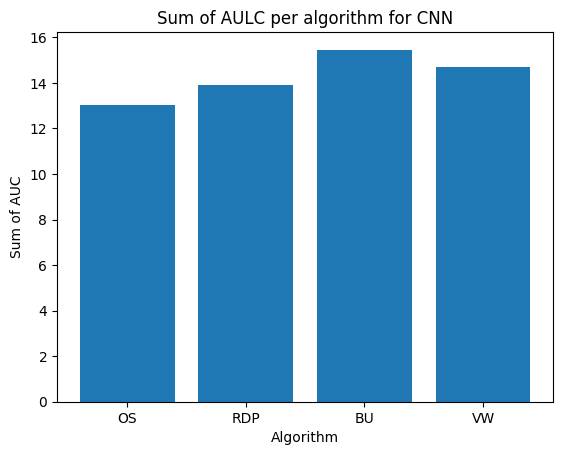

In [56]:
sum_auc = [os_alg_sum_cnn, rdp_alg_sum_cnn, bu_alg_sum_cnn, vw_alg_sum_cnn]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for CNN')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

In [57]:
os_alg_mean_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU"')["performance"].mean()
vw_alg_mean_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_cnn)
print("RDP: ", rdp_alg_mean_cnn)
print("BU: ", bu_alg_mean_cnn)
print("VW: ", vw_alg_mean_cnn)

Mean of AUC per algorithm
OS:  0.7654951472876647
RDP:  0.8174643871616665
BU:  0.9092895894258479
VW:  0.8635756026019457


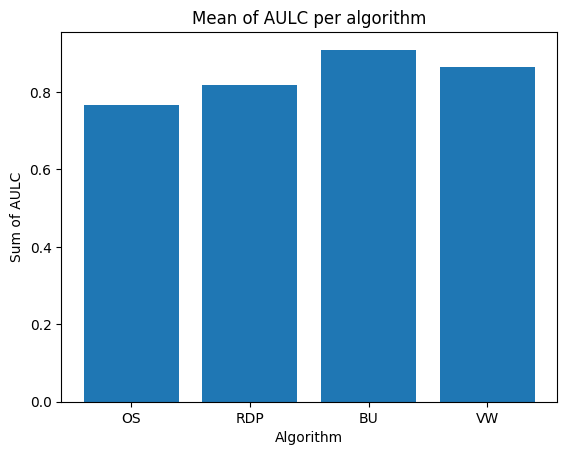

In [58]:
sum_auc = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_alg_mean_cnn, vw_alg_mean_cnn]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

In [59]:
datasets = results_cnn['dataset'].unique()

for dataset in datasets:
    dat_df = results.query(f'dataset == "{dataset}"')
    simp_algorithms = dat_df['simp_algorithm']
    #print(simp_algorithms)
    knees_df = dat_df["knee(x,y)"]
    #comb = zip(simp_algorithms, knees_df)
    knees = [[float(knee.replace("(", "").replace(")", "").split(",")[0]), float(knee.replace("(", "").replace(")", "").split(",")[1])] for knee in knees_df]

    x_values = [x for x, y in knees]
    y_values = [y for x, y in knees]

    min_x = min(x_values)
    min_x_index = x_values.index(min_x)
    y = y_values[min_x_index]

    y_max = max(y_values)
    if y == y_max:
        #sim_alg = simp_algorithms[min_x_index]
        print(f"Best model for {dataset} is {dat_df['model'].values[0]}, simp alg.  with AUC {y} at knee points {min_x, y}")
    

Best model for ECGFiveDaysTEST_normalized is cnn_norm.pth, simp alg.  with AUC 1.0 at knee points (0.03860294117647054, 1.0)
Best model for FacesUCRTEST_normalized is cnn_norm.pth, simp alg.  with AUC 1.0 at knee points (0.1413740458015268, 1.0)
Best model for DistalPhalanxTWTEST_normalized is cnn_norm.pth, simp alg.  with AUC 1.0 at knee points (0.11400000000000002, 1.0)
Best model for WaferTEST_normalized is cnn_norm.pth, simp alg.  with AUC 1.0 at knee points (0.016447368421052613, 1.0)


In [60]:
import numpy as np

electric_device = np.load("../data/ElectricDevices/ElectricDevices_TEST_normalized.npy")

labels = [arr[0] for arr in electric_device]
print(labels[:100])
print(set(labels[:100]))
#print(labels.count())


[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
{6.0}
